### Obrada informacija

# 4. Laboratorijska vježba:  Multivarijatni financijski vremenski nizovi

*Prosinac 2024.*

## Upute

U ovoj bilježnici dana je priprema sa svim uputama za 4. laboratorijsku vježbu iz predmeta Obrada informacija - uz bilježnicu su dostupni i podatci u datoteci `prices.csv`.

Vaš zadatak je u bilježnicu na odgovarajuća mjesta dopisati kod Vašeg rješenja,.

**Riješenu bilježnicu potrebno je predati kao izvještaj u .pdf formatu na *Moodle* najkasnije do 17.1.2024. u 23:59h. Datoteka koju predajete se mora zvati *PrezimeImeJMBAG.pdf*.**



## Uvod

U laboratorijskoj vježbi razmatra se dinamika cijena vrijednosnica na financijskim tržištima. Dane su povijesne dnevne cijene 24 ETF-a (eng. *exchange traded fund*) koji prate određene dioničke, obvezničke ili druge indekse.

Oznaka | Naziv | Klasa imovine
--- | --- | ---
SPY | SPDR S&P 500 ETF Trust | Equity: U.S. - Large Cap
IEFA | iShares Core MSCI EAFE ETF | Equity: Developed Markets Ex-U.S. - Total Market
VWO | Vanguard FTSE Emerging Markets ETF | Equity: Emerging Markets - Total Market
EWJ | iShares MSCI Japan ETF | Equity: Japan - Total Market
XLF | Financial Select Sector SPDR Fund | Equity: U.S. Financials
XLK | Technology Select Sector SPDR Fund | Equity: U.S. Technology
XLV | Health Care Select Sector SPDR Fund | Equity: U.S. Health Care
XLY | Consumer Discretionary Select Sector SPDR Fund | Equity: U.S. Consumer Cyclicals
XLP | Consumer Staples Select Sector SPDR Fund | Equity: U.S. Consumer Non-cyclicals
XLU | Utilities Select Sector SPDR Fund | Equity: U.S. Utilities
XLI | Industrial Select Sector SPDR Fund | Equity: U.S. Industrials
XLE | Energy Select Sector SPDR Fund | Equity: U.S. Energy
XLC | Communication Services Select Sector SPDR Fund | Equity: U.S. Telecommunications
XLRE | Real Estate Select Sector SPDR Fund | Equity: U.S. Real Estate
XLB | Materials Select Sector SPDR Fund | Equity: U.S. Basic Materials
BND | Vanguard Total Bond Market ETF | Fixed Income: U.S. - Broad Market |  Broad-based Investment Grade
LQD | iShares iBoxx USD Investment Grade Corporate Bond ETF | Fixed Income: U.S. - Corporate |  Broad-based Investment Grade
BNDX | Vanguard Total International Bond ETF | Fixed Income: Global Ex-U.S. - Broad Market |  Broad-based Investment Grade
SHV | iShares Short Treasury Bond ETF | Fixed Income: U.S. - Government |  Treasury Investment Grade Ultra-Short Term
HYG | iShares iBoxx USD High Yield Corporate Bond ETF | Fixed Income: U.S. - Corporate |  Broad-based High Yield
GLD | SPDR Gold Trust | Commodities: Precious Metals Gold
SLV | iShares Silver Trust | Commodities: Precious Metals Silver
PDBC | Invesco Optimum Yield Diversified Commodity Strategy No K-1 ETF | Commodities: Broad Market
USO | United States Oil Fund LP | Commodities: Energy Crude Oil

Pri modeliranju zajedničkog kretanja i rizika vrijednosnica, koristit ćemo aritmetičke povrate:

$R(t) = \frac{S(t)-S(t-1)}{S(t-1)},$

gdje je $S(t)$ cijena vrijednosnice u danu $t$. U sklopu ove laboratorijske vježbe cilj je analizirati kretanje danih ETF-ova i izračunati glavne komponente (PCA) koje utječu na njihovu dinamiku. Laboratorijsku vježbu je potrebno riješiti unutar ove bilježnice i predati riješenu bilježnicu kao izvještaj.

In [6]:
import pandas as pd

prices = pd.read_csv('prices.csv')
prices.set_index('Time', inplace=True)
prices.index = pd.to_datetime(prices.index)  # bez ovog bi vrijendoit bili obicni stringovi ovkao pretvarmao bas u datetime object

prices.head()


,SPY,IEFA,VWO,EWJ,XLF,XLK,XLV,XLY,XLP,XLU,...,XLB,BND,LQD,BNDX,SHV,HYG,GLD,SLV,PDBC,USO
Time,,,,,,,,,,,,,,,,,,,,,
2019-01-02,228.403641,45.796803,32.461216,45.781605,21.425070,58.594608,77.260376,94.483681,43.373131,43.356884,...,45.167751,67.512207,92.559242,46.240116,95.842651,58.963661,121.330002,14.56,8.201962,78.800003
2019-01-03,222.953278,45.495949,31.952288,45.521481,20.943409,55.637482,75.691597,92.437935,43.123962,43.348557,...,43.886906,67.775871,92.600182,46.240116,95.877365,58.992794,122.430000,14.75,8.261633,79.599998
2019-01-04,230.421265,46.874874,32.961674,47.064281,21.639147,58.103325,77.949570,95.497078,44.043327,43.990444,...,45.612503,67.571701,92.542915,46.197544,95.903488,59.982925,121.440002,14.73,8.380974,81.440002
2019-01-07,232.238052,47.100510,33.029510,47.180885,21.665901,58.622952,78.248802,97.656494,43.983185,43.690346,...,45.772594,67.469627,92.551117,46.086876,95.903488,60.565334,121.860001,14.67,8.446068,82.320000
2019-01-08,234.420044,47.434795,33.216133,47.405128,21.683739,59.114239,78.856377,98.736206,44.387012,44.232204,...,46.252922,67.384583,92.755562,46.052830,95.894760,60.958515,121.529999,14.69,8.516588,84.000000


# Zadatak 1 - Računanje korelacijske matrice i matrice kovarijance povrata

1.1. U prvom zadatku ove laboratorijske vježbe potrebno je prvo iz danih cijena (gore učitanih u Pandas DataFrame) izračunati dnevne povrate za sve pojedine vrijednosnice (prateći formulu danu u uvodu).

Izračunajte srednje povrate i volatilnost (standardnu devijaciju povrata) za svaku pojedinu vrijednosnicu. Pri analizi srednjih povrata i volatilnosti, te se brojke često *anualiziraju* - to znači da se srednji povrati pomnože s $252$ (cca. broj trgovinskih dana u godini), a volatilnost s $\sqrt{252}$.

**Izračunajte anualizirane srednje povrate i volatilnosti. Sve ETF-ove prikažite u dijagramu raspršenja s volatilnošću na x-osi i srednjim povratom na y-osi.**

Razmislite - koji se ETF-ovi ističu po odnosu povrata i rizika (posebno dobri ili posebno loši kao investicije)?


SPY     0.177849
IEFA    0.088117
VWO     0.072797
EWJ     0.077634
XLF     0.165866
XLK     0.265742
XLV     0.112391
XLY     0.177103
XLP     0.114491
XLU     0.116566
XLI     0.160515
XLE     0.164938
XLC     0.176782
XLRE    0.107505
XLB     0.131425
BND     0.013445
LQD     0.029531
BNDX    0.014820
SHV     0.023082
HYG     0.052390
GLD     0.126956
SLV     0.147122
PDBC    0.098013
USO     0.076122
dtype: float64
SPY     0.198523
IEFA    0.188451
VWO     0.204551
EWJ     0.179911
XLF     0.249093
XLK     0.265948
XLV     0.176093
XLY     0.244746
XLP     0.160785
XLU     0.218113
XLI     0.221584
XLE     0.341693
XLC     0.232001
XLRE    0.234709
XLB     0.228101
BND     0.065573
LQD     0.104004
BNDX    0.047116
SHV     0.002958
HYG     0.098116
GLD     0.149683
SLV     0.301798
PDBC    0.190054
USO     0.419480
dtype: float64


C:\Users\Fran\AppData\Local\Temp\ipykernel_11424\755916217.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (annualized_std_returns[i], annualized_mean_returns[i]))


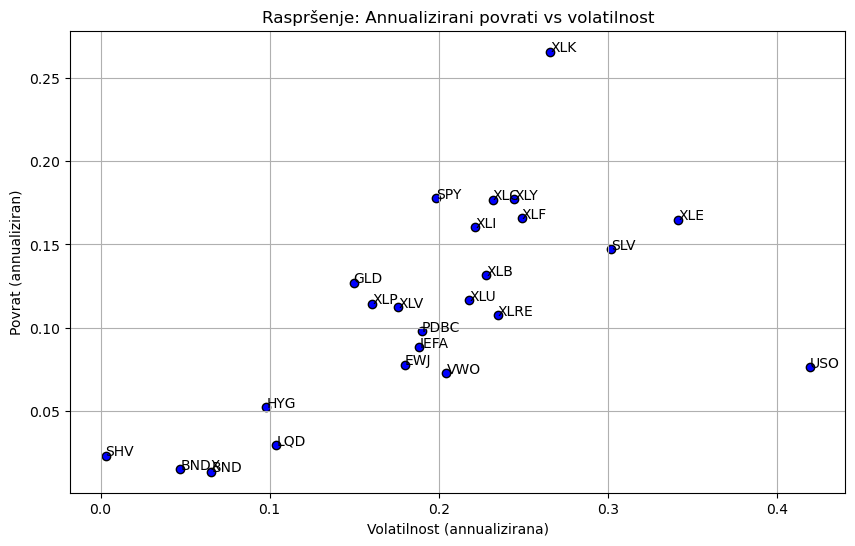

In [ ]:
from matplotlib import pyplot as plt


daily_returns = prices.pct_change().dropna()# aritmeticki povrat

mean_returns = daily_returns.mean()
#print(mean_returns)
std_returns = daily_returns.std()
#print(std_returns)

annualized_mean_returns = mean_returns * 252 # broj randih dana u godini
annualized_std_returns = std_returns * (252 ** 0.5)
print(annualized_mean_returns)
print(annualized_std_returns)

# Graf raspršenja
plt.figure(figsize=(10, 6))
plt.scatter(annualized_std_returns, annualized_mean_returns, c='blue', edgecolors='k')
plt.title('Raspršenje: Annualizirani povrati vs volatilnost')
plt.xlabel('Volatilnost (annualizirana)')
plt.ylabel('Povrat (annualiziran)')
plt.grid(True)

# Dodavanje oznaka za svaku vrijednosnicu
for i, txt in enumerate(prices.columns):
    plt.annotate(txt, (annualized_std_returns[i], annualized_mean_returns[i]))

plt.show()
# Posebno dobri ETF-ovi bi bilo oni koji imaju veliki povrat a relativno malu varijablinos npr. XLK a los bi bio onaj npr. koji ima veliku volatilnost i lose povrat npr. USO

1.2. Kovarijancu i korelaciju moguće je iz podataka izračunati koristeći Pandas, ali i NumPy ili neke druge biblioteke.

**Koristeći dnevne povrate, izračunajte matricu kovarijance $\Sigma$ i matricu korelacije $C$ povrata svih ETF-ova.
Matrice ispišite u konzolu ili vizualizirajte.**

Proučite strukturu matrice i razmislite o tome koje zajedničke komponente u podatcima možete očekivati.

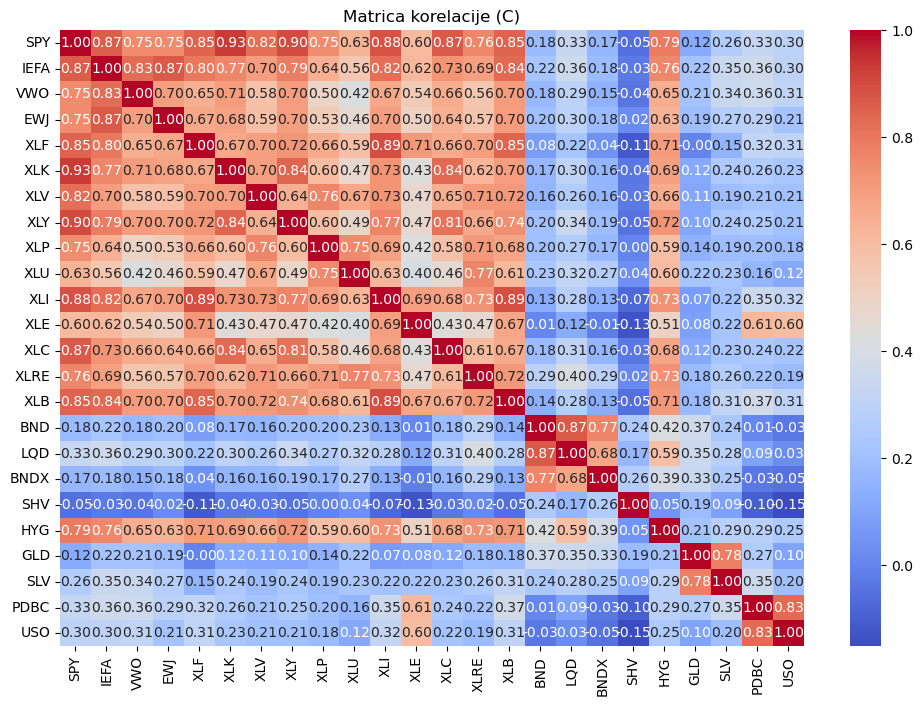

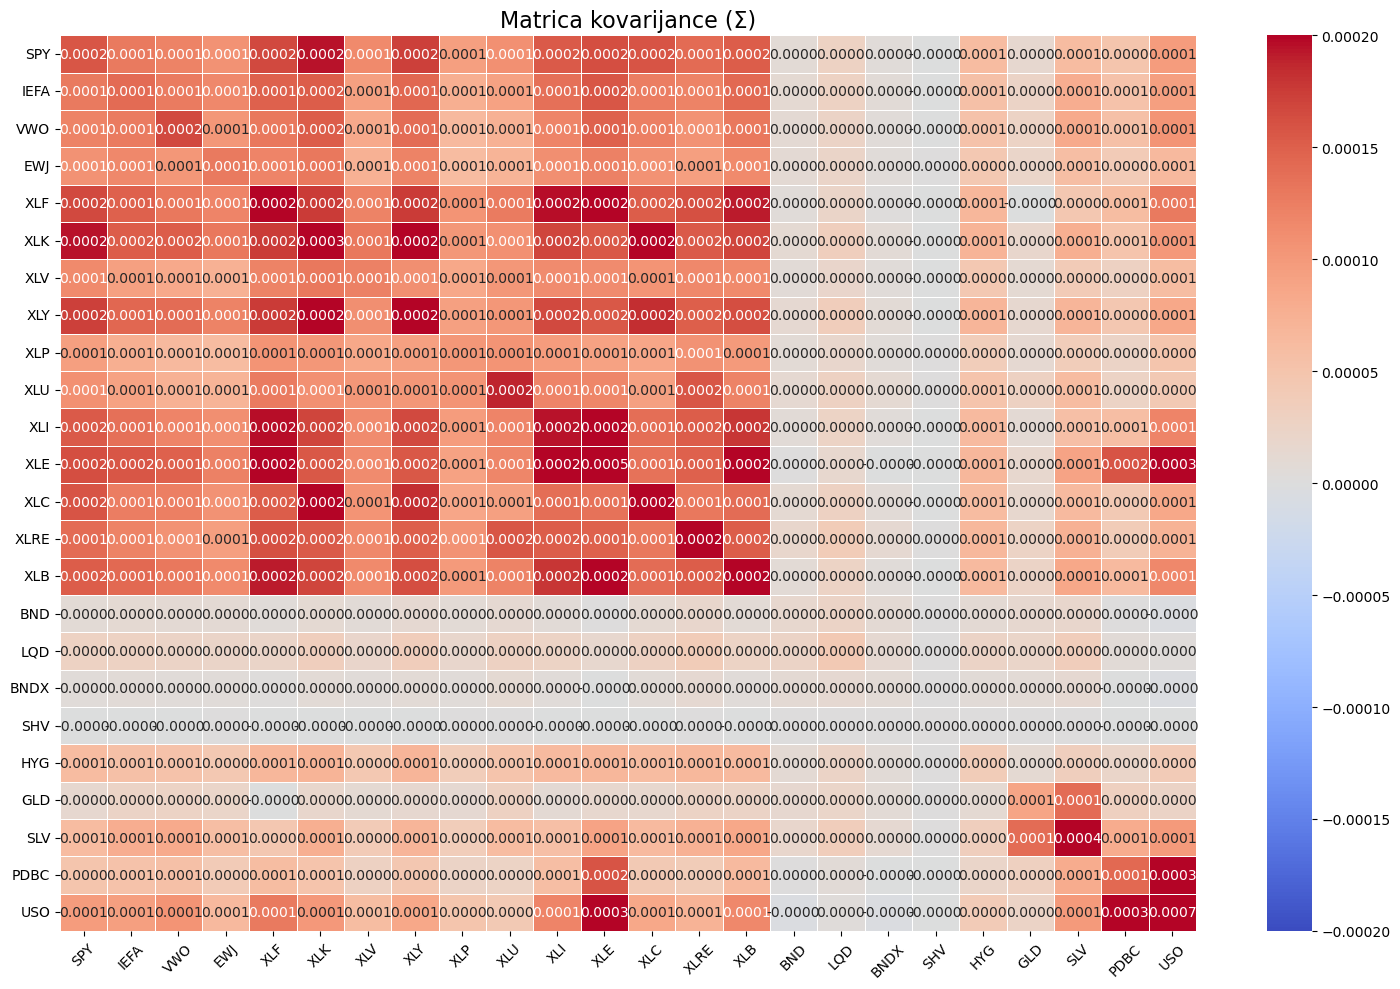

In [22]:
import seaborn as sns

covariance_matrix = daily_returns.cov()
correlation_matrix = daily_returns.corr()

# Vizualizacija matrice korelacije
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matrica korelacije (C)")
plt.show()

# Vizualizacija matrice kovarijance s poboljšanjima
plt.figure(figsize=(15, 10))
sns.heatmap(covariance_matrix, annot=True, fmt=".4f", cmap="coolwarm", cbar=True, linewidths=0.5, vmin=-0.0002, vmax=0.0002)
plt.title("Matrica kovarijance (Σ)", fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

# Na grafovima je lako uočljivo nekoliko mogućih grupacija podataka ovinso koji imaju visoku korelaciju. Ove komponente se temelje na sektorima, regijama, vrstama imovine i tržišnim uvjetima. 

# Zadatak 2 - Analiza glavnih komponenti

2.1. Za analizu glavnih komponenti potrebno je izračunati svojstvenu dekompoziciju, koju možete pronaći u sklopu biblioteke NumPy https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html.

**Izračunajte svojstvene vektore i pripadajuće svojstvene vrijednosti matrice kovarijance povrata $\Sigma$. Poredajte komponente padajući po svojstvenim vrijednostima i prikažite svojstvene vrijednosti grafički (scree plot).**



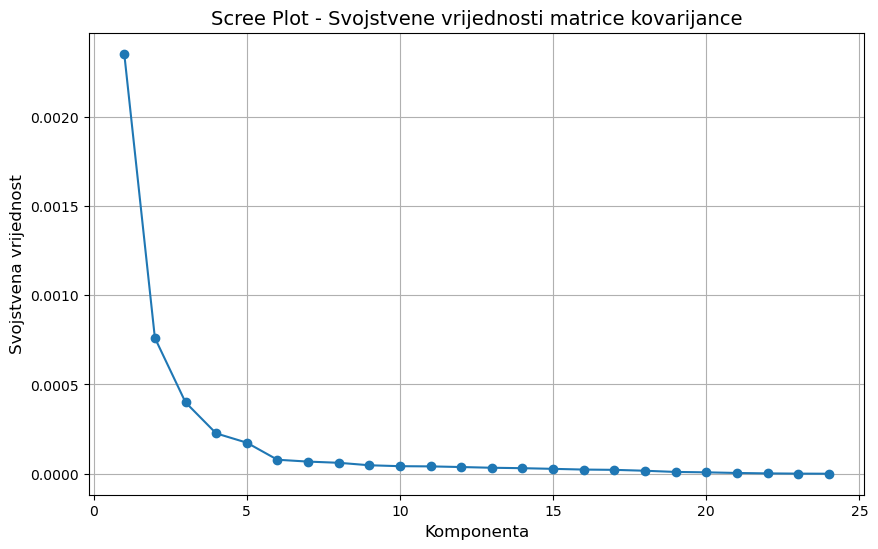

Svojstvene vrijednosti (poredane opadajuće):
[2.35244403e-03 7.60687740e-04 3.99747228e-04 2.26012206e-04
 1.73911679e-04 7.83695474e-05 6.79520823e-05 6.12661410e-05
 4.74491307e-05 4.22362893e-05 4.10997512e-05 3.74837308e-05
 3.34208466e-05 3.10065716e-05 2.73517811e-05 2.33055220e-05
 2.17177198e-05 1.66668660e-05 1.00251299e-05 7.79431310e-06
 4.23066992e-06 1.82519871e-06 5.71175049e-07 3.02242803e-08]

Svojstveni vektori (poredani prema svojstvenim vrijednostima):
[[-2.43080116e-01  1.16839662e-01 -4.17742916e-02  1.22366216e-01
  -1.87520039e-02 -1.38940956e-01 -2.85677784e-02 -4.92634796e-02
  -2.79270211e-02  8.98191727e-02 -4.76147275e-02  3.30514056e-02
  -2.78417752e-02 -2.84333252e-02  5.20241771e-02 -1.08614434e-02
  -1.90840893e-02 -2.68297559e-03 -1.21408716e-02 -5.16406458e-03
  -1.73400413e-02  2.20564059e-02 -9.32561515e-01 -4.90491258e-03]
 [-2.19615263e-01  7.76246830e-02  3.02817003e-02  3.33362431e-02
   1.16802875e-01  3.70149925e-01 -3.93820510e-02 -5.90479463

In [23]:
import numpy as np

# Izračun svojstvenih vrijednosti i svojstvenih vektora
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# 2. Sortiranje svojstvenih vrijednosti u opadajućem redoslijedu
sorted_indices = np.argsort(eigenvalues)[::-1] # nadi mi one indekse koji bi sorirali elmente uzlazno i onda to obrni da bude silazno
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# 3. Prikaz svojstvenih vrijednosti (scree plot)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, marker='o', linestyle='-')
plt.title('Scree Plot - Svojstvene vrijednosti matrice kovarijance', fontsize=14)
plt.xlabel('Komponenta', fontsize=12)
plt.ylabel('Svojstvena vrijednost', fontsize=12)
plt.grid(True)
plt.show()

# 4. Ispis svojstvenih vrijednosti i vektora
print("Svojstvene vrijednosti (poredane opadajuće):")
print(sorted_eigenvalues)
print("\nSvojstveni vektori (poredani prema svojstvenim vrijednostima):")
print(sorted_eigenvectors)

2.2. **Izračunajte koliki udio ukupne varijance objašnjavaju prve tri komponente (kumulativno)?**

In [30]:
total_variance = np.sum(sorted_eigenvalues)
explained_variance_ratio = sorted_eigenvalues[:3] / total_variance
cumulative_variance_ratio = np.sum(explained_variance_ratio)

print(f"Udio ukupne varijance objašnjen prvom komponentom: {explained_variance_ratio[0]:.2%}")
print(f"Udio ukupne varijance objašnjen drugom komponentom: {explained_variance_ratio[1]:.2%}")
print(f"Udio ukupne varijance objašnjen trećom komponentom: {explained_variance_ratio[2]:.2%}")
print(f"Kumulativni udio varijance za prve tri komponente: {cumulative_variance_ratio:.2%}")


Udio ukupne varijance objašnjen prvom komponentom: 52.67%
Udio ukupne varijance objašnjen drugom komponentom: 17.03%
Udio ukupne varijance objašnjen trećom komponentom: 8.95%
Kumulativni udio varijance za prve tri komponente: 78.65%


2.3. Komponente PCA će u financijama često opisivati neke zajedničke faktore u podatcima, što je moguće analizirati promatranjem pojedinih elemenata svojstvenih vektora. Ako je neki element određenog svojstvenog vektora velik po magnitudi (pozitivan ili negativan), to znači da ta komponenta opisuje odgovarajuću vrijednosnicu i objašnjava njenu varijancu, za razliku od slučaja kad je element blizu 0, što znači da razmatrana vrijednosnica ne ovisi previše o toj komponenti.  

**Prikažite grafički (npr. stupčastim dijagramom za svaku komponentu posebno) koeficijente prve 3 glavne komponente (elemente prva tri svojstvena vektora).**

S obzirom na to koje vrijednosnice opisuju prve tri komponente, razmislite možete li zaključiti kakve zajedničke faktore u tržištu opisuju razmatrane komponente?

NAPOMENA: pripazite na to što vraća funkcija koju koristite i u kojoj se dimenziji (stupac ili red) nalaze svojstveni vektori.

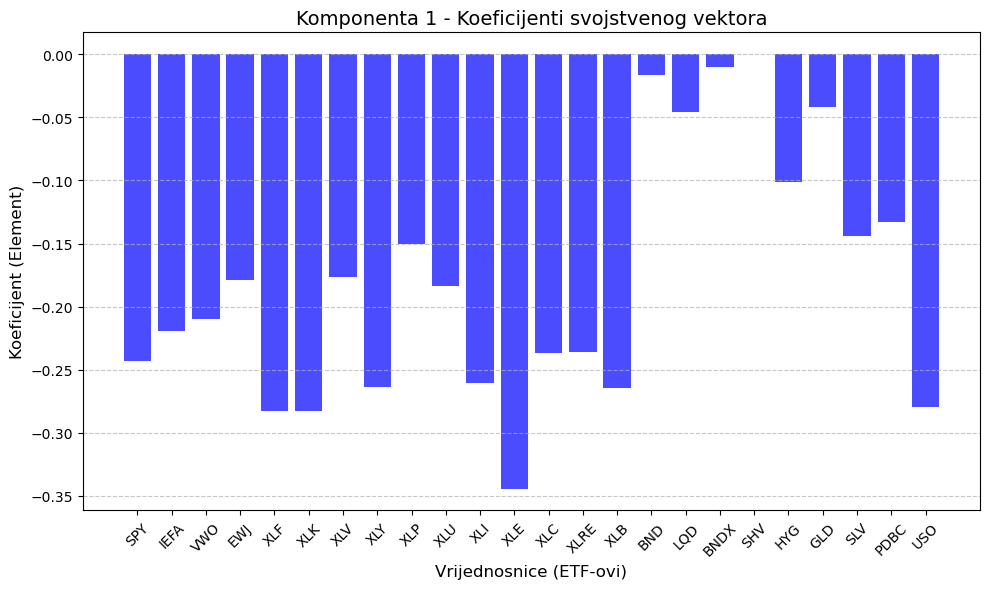

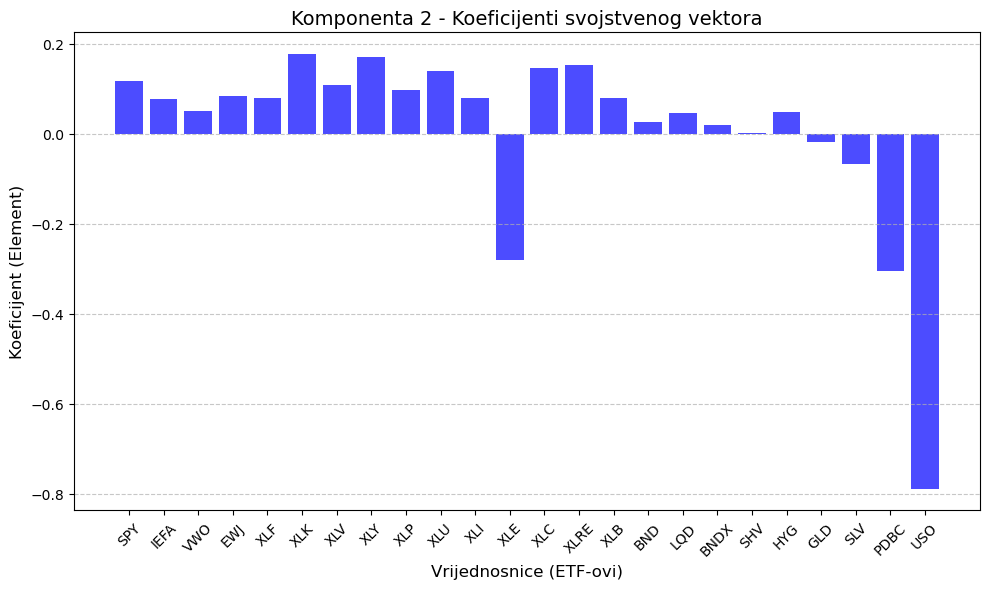

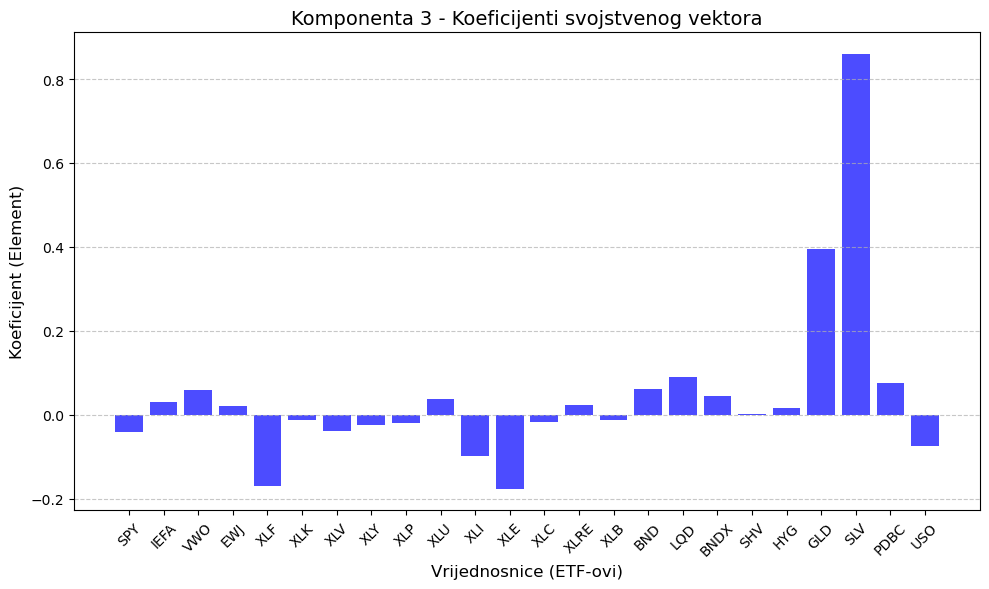

In [31]:
components = sorted_eigenvectors[:, :3]  # Prve tri komponente

etf_names = covariance_matrix.columns  # Pretpostavka: ovo su nazivi vrijednosnica

for i in range(3):
    plt.figure(figsize=(10, 6))
    plt.bar(etf_names, components[:, i], color='blue', alpha=0.7)
    plt.title(f"Komponenta {i+1} - Koeficijenti svojstvenog vektora", fontsize=14)
    plt.xlabel("Vrijednosnice (ETF-ovi)", fontsize=12)
    plt.ylabel("Koeficijent (Element)", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [ ]:
# Analiza glavnih komponenti (Komponenta 1, 2, 3)

# Komponenta 1:
# - Graf pokazuje da većina vrijednosnica ima slične negativne koeficijente, što sugerira da ova komponenta
#   objašnjava zajednički tržišni faktor koji utječe na sve vrijednosnice.
# - SPY, IEFA, VWO, i XLF (financijski sektor) imaju značajan doprinos, što sugerira da je ova komponenta
#   povezana s globalnim tržišnim trendovima i makroekonomskim uvjetima.
# - S druge strane, USO (nafta) i PDBC (sirovine) također imaju značajne negativne koeficijente, što implicira
#   povezanost s energetskim i sirovinskim tržištima.

# Komponenta 2:
# - Ovdje su XLE (energetika) i USO (nafta) najistaknutiji s velikim negativnim koeficijentima, što upućuje na
#   to da ova komponenta snažno opisuje dinamiku energetskog sektora.
# - Pozitivni koeficijenti kod XLP (potrošački proizvodi) i XLU (uslužne djelatnosti) sugeriraju da ova komponenta
#   odražava diverzifikaciju između defenzivnih sektora (poput XLU) i volatilnijih sektora (poput energetike).

# Komponenta 3:
# - Graf ukazuje na to da GLD (zlato) i SLV (srebro) imaju dominantan doprinos ovoj komponenti.
# - Ovo snažno upućuje na to da ova komponenta opisuje faktore povezane s tržištima plemenitih metala.
# - Negativan doprinos USO (nafta) također ukazuje na razliku između plemenitih metala i energetskih tržišta,
#   što sugerira divergentne tržišne uvjete.

# Zaključak:
# - Komponenta 1: Objašnjava široke tržišne trendove, uključujući globalnu tržišnu dinamiku i makroekonomske faktore.
# - Komponenta 2: Fokusirana na sektor energetike i njegovu razliku u odnosu na defenzivne sektore.
# - Komponenta 3: Odražava utjecaje povezane s plemenitim metalima i diverzifikacijom prema sirovinama.

2.4. **Ponovite prethodnu analizu za matricu korelacije povrata $C$ (prikažite svojstvene vrijednosti, udio varijance i koeficijente pojedinih komponenti za prve tri komponente).**

Usporedite rezultate - mijenjaju li se interpretacije komponenti?

Svojstvene vrijednosti matrice korelacije (poredane opadajuće):
[1.19715098e+01 2.95530631e+00 2.06896137e+00 1.19524050e+00
 1.08076927e+00 8.65008701e-01 6.32826793e-01 4.24697344e-01
 3.42210938e-01 3.30235236e-01 3.01059505e-01 2.48249402e-01
 2.33104430e-01 1.99064293e-01 1.85967337e-01 1.70907389e-01
 1.61778121e-01 1.44099892e-01 1.33028132e-01 1.16396653e-01
 9.25834429e-02 7.65417069e-02 6.70455915e-02 3.40787259e-03]

Udio ukupne varijance objašnjen prve tri komponente (kumulativno):
Komponenta 1: 49.88%
Komponenta 2: 12.31%
Komponenta 3: 8.62%
Kumulativni udio varijance: 70.82%


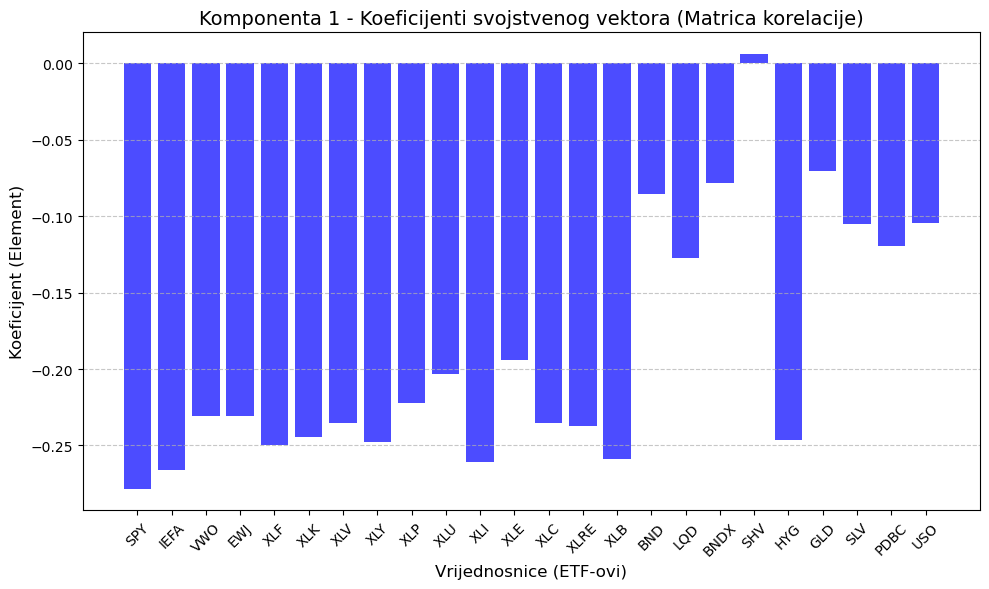

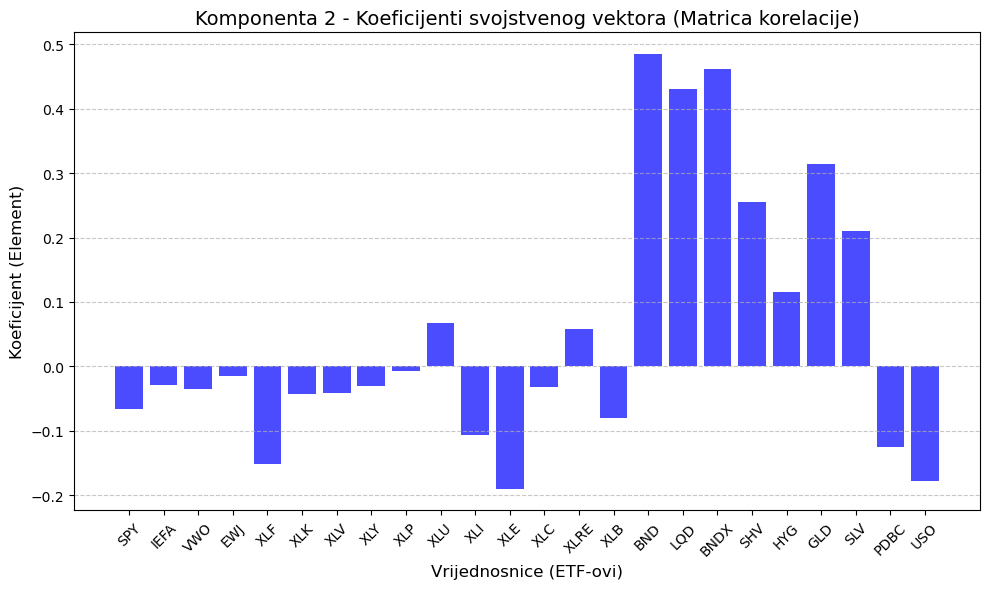

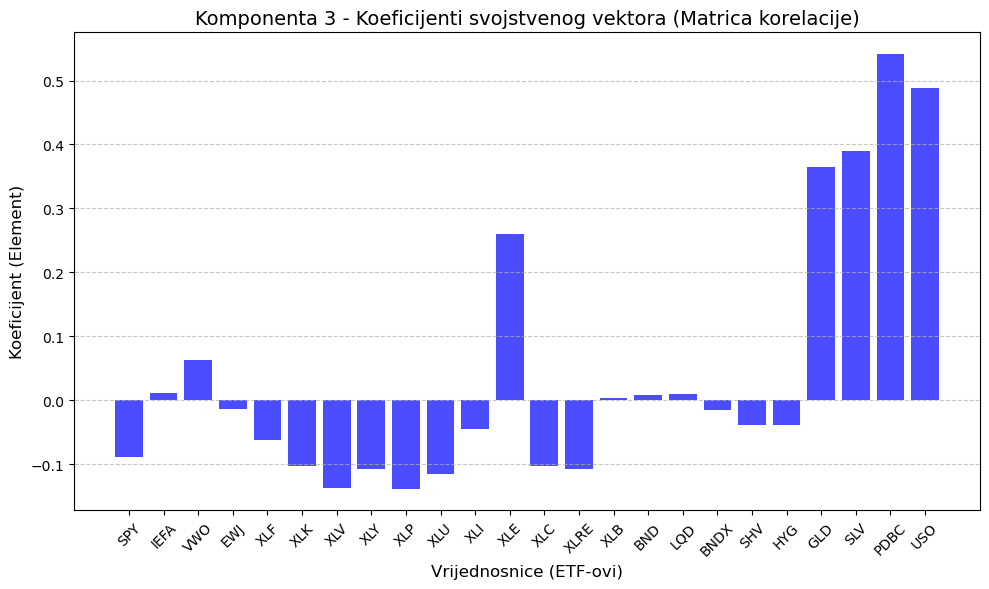

In [32]:
# 1. Izračun svojstvenih vrijednosti i vektora za matricu korelacije
eigenvalues_corr, eigenvectors_corr = np.linalg.eig(correlation_matrix)

# 2. Sortiranje svojstvenih vrijednosti i vektora
sorted_indices_corr = np.argsort(eigenvalues_corr)[::-1]
sorted_eigenvalues_corr = eigenvalues_corr[sorted_indices_corr]
sorted_eigenvectors_corr = eigenvectors_corr[:, sorted_indices_corr]

# 3. Izračun udjela varijance za prve tri komponente
total_variance_corr = np.sum(sorted_eigenvalues_corr)
explained_variance_ratio_corr = sorted_eigenvalues_corr[:3] / total_variance_corr
cumulative_variance_ratio_corr = np.sum(explained_variance_ratio_corr)

# 4. Ispis rezultata
print("Svojstvene vrijednosti matrice korelacije (poredane opadajuće):")
print(sorted_eigenvalues_corr)
print("\nUdio ukupne varijance objašnjen prve tri komponente (kumulativno):")
print(f"Komponenta 1: {explained_variance_ratio_corr[0]:.2%}")
print(f"Komponenta 2: {explained_variance_ratio_corr[1]:.2%}")
print(f"Komponenta 3: {explained_variance_ratio_corr[2]:.2%}")
print(f"Kumulativni udio varijance: {cumulative_variance_ratio_corr:.2%}")

# 5. Grafički prikaz koeficijenata svojstvenih vektora za prve tri komponente
for i in range(3):
    plt.figure(figsize=(10, 6))
    plt.bar(correlation_matrix.columns, sorted_eigenvectors_corr[:, i], color='blue', alpha=0.7)
    plt.title(f"Komponenta {i+1} - Koeficijenti svojstvenog vektora (Matrica korelacije)", fontsize=14)
    plt.xlabel("Vrijednosnice (ETF-ovi)", fontsize=12)
    plt.ylabel("Koeficijent (Element)", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Interpretacije se mijenjaju između matrice kovarijance i korelacije:
# - Kod kovarijance, komponente naglašavaju sektore s velikom apsolutnom volatilnošću (npr. XLE u prvoj komponenti).
# - Kod korelacije, doprinos ETF-ova je uravnoteženiji, naglašavajući relativne odnose među ETF-ovima.
# - Prve tri komponente kod kovarijance više objašnjavaju varijancu zbog apsolutne volatilnosti sektora.
# - Kod korelacije, prve tri komponente ravnomjernije obuhvaćaju odnose među ETF-ovima bez dominacije volatilnih sektora.


# Zadatak 3 - Svojstveni portfelji

U primjeni PCA i svojstvenoj dekompoziciji kovarijance u financijama, svojstveni vektori se često zovu i tzv. svojstveni portfelji.

Općenito, portfelj je vektor $w = [w_1,...,w_N]$ u kojem svaki element predstavlja težinu ili udio kapitala u određenoj vrijednosnici. Same težine svojstvenih portfelja mogu biti rotirane i skalirane u odnosu na elemente svojstvenih vektora.

U ovoj analizi ćemo pomnožiti njihove težine s predznakom njihove sume - na taj način zapravo samo "okrećemo" predznak svojstvenog vektora tako da mu je suma pozitivna (konačni PCA rastav je i dalje isti ako svojstveni vektor pomnožimo s -1). Također, potrebno je i skalirati svojstvene portfelje sa sumom njihovih apsolutnih vrijednosti:

$\tilde{w}_i = \frac{w_i}{\sum_j^N{\vert w_j \vert}}$.

Na taj način se osigurava da visoke magnitude pojedinih elemenata ne uzrokuju velike razlike u volatilnostima svojstvenih portfelja.

Ukoliko znamo povrate $R\in\mathbb{R}^{T\times N}$ (gdje je $R_i\in\mathbb{R}^{T}$ vektor povrata za vrijednosnicu $i$) za $N$ vrijednosnica u nekom vremenskom periodu od $T$ dana, povrate portfelja $w$ u tom istom periodu možemo izračunati kao:

$R_p = \sum{R_i w_i} = R\cdot w$.


**Izračunajte adekvatno skalirane i rotirane svojstvene portfelje $\tilde{w}$ koji proizlaze iz prve tri glavne komponente dobivene iz matrice kovarijance $\Sigma$. Za ta tri svojstvena portfelja izračunajte povijesne povrate kroz razmatrani period. Grafički prikažite vremensko kretanje njihovih vrijednosti (njihove povrate "vratite" natrag u cijene, s tim da početna cijena bude jednak za sve portfelje, npr. 100).**



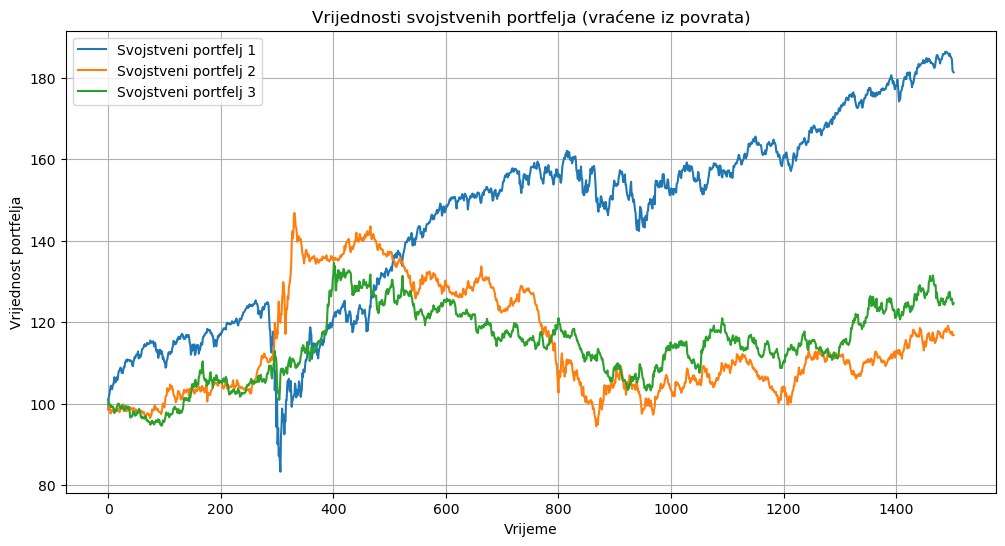

In [33]:
# Uzmi svojstvene vektore za prve tri glavne komponente
w1 = sorted_eigenvectors[:, 0]
w2 = sorted_eigenvectors[:, 1]
w3 = sorted_eigenvectors[:, 2]

# Funkcija za skaliranje i rotaciju težina
def scale_and_rotate_weights(w):
    w_rotated = w * np.sign(np.sum(w))  # Rotiraj težine tako da suma bude pozitivna
    w_scaled = w_rotated / np.sum(np.abs(w_rotated))  # Skaliraj težine
    return w_scaled

# Skalirane težine za prve tri glavne komponente
w1_scaled = scale_and_rotate_weights(w1)
w2_scaled = scale_and_rotate_weights(w2)
w3_scaled = scale_and_rotate_weights(w3)

# Dnevni povrati (pretpostavljamo da su izračunati)
daily_returns = prices.pct_change().dropna()

# Povrati svojstvenih portfelja - radimo matrično mnoenje
portfolio1_returns = daily_returns.values @ w1_scaled
portfolio2_returns = daily_returns.values @ w2_scaled
portfolio3_returns = daily_returns.values @ w3_scaled

# "Vraćanje" povrata u cijene (normaliziramo početnu cijenu na 100)
portfolio1_prices = 100 * (1 + np.cumsum(portfolio1_returns))
portfolio2_prices = 100 * (1 + np.cumsum(portfolio2_returns))
portfolio3_prices = 100 * (1 + np.cumsum(portfolio3_returns))

# Grafički prikaz svojstvenih portfelja
plt.figure(figsize=(12, 6))
plt.plot(portfolio1_prices, label="Svojstveni portfelj 1")
plt.plot(portfolio2_prices, label="Svojstveni portfelj 2")
plt.plot(portfolio3_prices, label="Svojstveni portfelj 3")
plt.title("Vrijednosti svojstvenih portfelja (vraćene iz povrata)")
plt.xlabel("Vrijeme")
plt.ylabel("Vrijednost portfelja")
plt.legend()
plt.grid()
plt.show()


Ako usporedite dobivene rezultate s kretanjem cijena originalnih vrijednosnica, vidjet ćete sličnosti između vrijednosnica koje pripadaju određenim klasama imovina i pojedinih svojstvenih portfelja. Svojstveni portfelji dakle predstavljaju niže-dimenzionalan prostor tzv. sintetičkih vrijednosnica (u našem slučaju 3 umjesto originalnih 24) koje najbolje opisuju cijeli razmatrani skup podataka. Dobra procjena tih komponenti je ključna u razumijevanju zajedničkog kretanja većih skupova dionica i upravljanju financijskim rizikom.

Razmislite što to znači za tržište koje smo analizirali - koji su glavni izvori rizika prevladavali u razmatranom periodu?

**Izračunajte korelacijske koeficijente između povrata tri razmatrana svojstvena portfelja (realizacije prve tri glavne komponente) i svih pojedinih ETF-ova - za svaki od tri svojstvena portfelja pronađite ETF koji mu je najsličniji (najviši iznos korelacije povrata).**

In [37]:
portfolio_returns_df = pd.DataFrame({
    'Portfolio 1': portfolio1_returns,
    'Portfolio 2': portfolio2_returns,
    'Portfolio 3': portfolio3_returns
})

# 1. Izračun korelacijske matrice između portfelja i ETF-ova
correlation_matrix = np.corrcoef(portfolio_returns_df.values.T, daily_returns.values.T)[:3, 3:]

# 2. Pronalazak ETF-a s najvećom korelacijom za svaki portfelj
max_correlation_indices = np.argmax(correlation_matrix, axis=1)  # Indeksi ETF-ova s najvećom korelacijom
max_correlation_values = np.max(correlation_matrix, axis=1)      # Vrijednosti najvećih korelacija

# 3. Dobivanje naziva ETF-ova
etf_names = daily_returns.columns.tolist()

# 4. Ispis rezultata
for i in range(3):  # Iteracija kroz tri portfelja
    etf_name = etf_names[max_correlation_indices[i]]
    correlation = max_correlation_values[i]
    print(f"Portfolio {i+1}: Najsličniji ETF je {etf_name} s korelacijom {correlation:.2f}")

Portfolio 1: Najsličniji ETF je SPY s korelacijom 0.94
Portfolio 2: Najsličniji ETF je XLY s korelacijom 0.30
Portfolio 3: Najsličniji ETF je SLV s korelacijom 0.90
